# Data preparation

In [1]:
import pandas
import os

#function that loads the data from the disk and return a Pandas Dataframe
def LoadData(path):
    #making a dataframe
    columns = ['text' , 'label']
    DF = pandas.DataFrame(columns=columns)
    
    counter = 0

    #traversing the folder
    for dirname, dirnames, filenames in os.walk(path):
        # traverse all filenames.
        for filename in filenames:
            #parsing the file
            print(dirname + '/' + filename)
            DF = Parser(dirname + '/' + filename, DF)
    
        return DF


#function that parser the TXT file and get the text in it
def Parser(path, df):
    data = open(path, encoding="utf8", errors='ignore').read()
    texts = [[],[]]
    for i, line in enumerate(data.split("\n")):
        
        #if this line contains a message, then it have the field name (body)
        bodyIndex = line.find('body')
        if(line.find('body') != -1):
            bodyIndex+=6
            toaIndex = line.find('toa')-2
            newLine = line[bodyIndex:toaIndex]
            label = getLabel(line)
            
        else:
            continue
        
        df = df.append({'text' : newLine, 'label' : label}, ignore_index=True)
    return df


def getLabel(line):
    #Ham
    if(line.find('contact_name="(Unknown)"') == -1):
        return 0
    #spam
    return 1
    

def splitAndLabelDataset(trainDF):
    # Splitting the dataset into training and validation datasets
    from sklearn import model_selection

    train_x, test_x, train_y, test_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])

    
    return train_x, test_x, train_y, test_y

KeyboardInterrupt: 

In [ ]:
# DF = LoadData('data/raw')

# DF.to_csv('rawData.csv')

# DF = DF.drop_duplicates('text') 

# DF.to_csv('rawDataDuplicatesRemoved.csv')

In [459]:
#reading Data
TrainDF = pandas.read_csv('rawDataDuplicatesRemoved.csv')

In [6]:
TrainDF

,Unnamed: 0,text,label
0,0,طاابااااع ٨٥ جبر عام,0
1,1,هوووولي شت نزلو &#128561;&#128561;&#128561;&#1...,0
2,2,&#128546; لا انا جايب ٧٩ &#128546;&#128546;&#1...,0
3,3,&#128546;&#128546;&#128546;&#128546;انيج يللي ...,0
4,4,0992864961,0
5,5,خير شريك ليش اليوم اوف لاين صاير معك شي,0
6,6,الله يجعلك بخيير هااااريتاااااني ....&#10;لا و...,0
7,7,ماما انا بلمحاضرة,0
8,8,هاااااااريتااااالني جييب معك المسائل بكرا زكات...,0
9,9,بابا انا اليوم طالع عل 12 ونص,0


In [462]:
TrainDF['length'] = TrainDF['text'].str.len()
TrainDF.sort_values('length', ascending=False, inplace=True)

In [464]:
TrainDF[TrainDF['length'] > 10]

,Unnamed: 0,text,label,length
2491,2743,سوا غروب تقدم حفل عيد الميلاد مع النجم معين شر...,1,399.0
3120,3826,سوا غروب تقدم حفل سهرة الميلاد مع النجم حسين ا...,1,396.0
269,274,مرحبا عمو هي طريقة تفعيل البيانات&#10;الاعدادا...,0,363.0
2456,2680,لازمك غرض معين بس ما عندك وقت تدور عليه بالسوق...,1,314.0
2807,3270,عزيزي صاحب الرقم 0993894558 &#10;&#10;بعد لحظا...,1,311.0
2161,2341,تحدي خاص لصاحب الرقم 0990235899 !&#10;إذا اس...,1,309.0
2800,3261,عزيزي صاحب الرقم 0993894558 &#10;&#10;يومان عل...,1,305.0
2797,3258,الملكي ضيفاً على الغواصات الصفراء ، يا ترى شو ...,1,294.0
2866,3357,بتعرف أنه تطبيق التيليغرام تطبيق خفيف عالموباي...,1,293.0
2790,3247,مع ياهلا على كيفك صمم باقتك على مزاجك..اختارعد...,1,292.0


## Making the dataset even

In [466]:
len(TrainDF)

3121

In [482]:
len(TrainDF[TrainDF['label']==1])

1274

In [483]:
len(TrainDF[TrainDF['label']==0])

1274

In [473]:
spamLength = len(TrainDF[TrainDF['label']==1])

hams = TrainDF[TrainDF['label']==0]
newHams = hams[:spamLength]
TrainDF[TrainDF['label']==0] = newHams

In [481]:
TrainDF = TrainDF.dropna()

In [484]:
TrainDF

,Unnamed: 0,text,label,length
2491,2743.0,سوا غروب تقدم حفل عيد الميلاد مع النجم معين شر...,1.0,399.0
3120,3826.0,سوا غروب تقدم حفل سهرة الميلاد مع النجم حسين ا...,1.0,396.0
269,274.0,مرحبا عمو هي طريقة تفعيل البيانات&#10;الاعدادا...,0.0,363.0
2456,2680.0,لازمك غرض معين بس ما عندك وقت تدور عليه بالسوق...,1.0,314.0
2807,3270.0,عزيزي صاحب الرقم 0993894558 &#10;&#10;بعد لحظا...,1.0,311.0
2161,2341.0,تحدي خاص لصاحب الرقم 0990235899 !&#10;إذا اس...,1.0,309.0
2800,3261.0,عزيزي صاحب الرقم 0993894558 &#10;&#10;يومان عل...,1.0,305.0
2797,3258.0,الملكي ضيفاً على الغواصات الصفراء ، يا ترى شو ...,1.0,294.0
2866,3357.0,بتعرف أنه تطبيق التيليغرام تطبيق خفيف عالموباي...,1.0,293.0
2790,3247.0,مع ياهلا على كيفك صمم باقتك على مزاجك..اختارعد...,1.0,292.0


In [485]:
len(TrainDF[TrainDF['label']==1])

1274

In [486]:
len(TrainDF[TrainDF['label']==0])

1274

# Text Preprocessing

In [487]:
import re
def removeLinks(line):
    line = str(line)
    #HTML and links
    regy1 = r'http\S+'
    regy2 = r'pic.twitter.com\/[a-zA-Z0-9]+'
    new_text = re.sub(regy1, '', line)
    new_text = re.sub(regy2, '', new_text)
    return new_text

In [488]:
from cltk.corpus.arabic.utils.pyarabic import araby
def normalize(line):
    string = line.split()
    new_string = []
    for s in string:
        newr = s
        newr = araby.normalize_hamza(newr)
        newr = araby.normalize_ligature(newr)
        newr = araby.strip_harakat(newr)
        newr = araby.strip_tatweel(newr)
        newr = araby.strip_tashkeel(newr)
        newr = araby.strip_shadda(newr)

        haa = r'ه|ة'
        newHaa = r'ه'
        newr = re.sub(haa, newHaa, newr)
        
        haa = r'ء'
        newHaa = r'ا'
        newr = re.sub(haa, newHaa, newr)
        
        new_string.append(newr)

    new_res = " ".join(new_string)
    
    return new_res

In [489]:
def removeDCaracters(line):
    regy1 = r'([ا-ي])\1+'
    new_text = re.sub(regy1, r'\1', line)
    return new_text

In [490]:
def removeEnglishLetters(line):
    regy1 = r'[a-zA-Z]'
    new_text = re.sub(regy1, r'', line)
    return new_text

In [491]:
removeEnglishLetters('hi how are you الحمد لله تمام انت كيفك').split()

['الحمد', 'لله', 'تمام', 'انت', 'كيفك']

In [492]:
from nltk.stem.isri import ISRIStemmer
steme = ISRIStemmer()
def stemmer(line):
    string = line.split()
    new_string = []
    for s in string:
        new_string.append(steme.stem(s))
    new_res = " ".join(new_string)
    return new_res

In [493]:
stemmer('تحتاج')

'حاج'

In [494]:
def textRemoveNumbers(input_str):
    return re.sub(r'\d', '', input_str)

In [495]:
def textRemovePunctuation(input_str):
    import string
    table = str.maketrans({key: None for key in string.punctuation})
    return input_str.translate(table)

In [496]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

def textRemoveStopWords(input_str):
    
    stop_words = set(stopwords.words('arabic'))
    
    stop_words.add(',')
    stop_words.add('لس')
    stop_words.add('ب')
    stop_words.add('لس،')
    
    word_tokens = word_tokenize(input_str) 
    
    result = [i for i in word_tokens if not i in stop_words]
    
    
    
    filtered_string = ""
    for word in result:
        filtered_string = filtered_string + word + " "
    return filtered_string

In [497]:
def textRemoveCertianCharacters(line):
    line = str(line)
    regy1 = r'\?|\؟|\.|\...	'
    new_text = re.sub(regy1, '', line)
    
    return new_text

In [498]:
def applyPreprocessing(DF):
    newDF = DF.copy()
    newDF['text'] = newDF['text'].apply(removeLinks)
    newDF['text'] = newDF['text'].apply(normalize)
    newDF['text'] = newDF['text'].apply(removeDCaracters)
    newDF['text'] = newDF['text'].apply(removeEnglishLetters)
    #newDF['text'] = newDF['text'].apply(stemmer)
    newDF['text'] = newDF['text'].apply(textRemoveNumbers)
    newDF['text'] = newDF['text'].apply(textRemovePunctuation)
    newDF['text'] = newDF['text'].apply(textRemoveStopWords)
    newDF['text'] = newDF['text'].apply(textRemoveCertianCharacters)
    return newDF

In [499]:
processedTrainDf = applyPreprocessing(TrainDF)

In [501]:
processedTrainDf

,Unnamed: 0,text,label,length
2491,2743.0,سوا غروب تقدم حفل عيد الميلاد النجم معين شريف ...,1.0,399.0
3120,3826.0,سوا غروب تقدم حفل سهره الميلاد النجم حسين الدي...,1.0,396.0
269,274.0,مرحبا عمو طريقه تفعيل البياناتالاعداداتمزيد ال...,0.0,363.0
2456,2680.0,لازمك غرض معين عندك وقت تدور بالسوق عندك غرض ب...,1.0,314.0
2807,3270.0,عزيزي صاحب الرقم لحظات موعدك الملاين و السياره...,1.0,311.0
2161,2341.0,تحدي خاص لصاحب الرقم اذا استطعت الاجابه اساله ...,1.0,309.0
2800,3261.0,عزيزي صاحب الرقم يومان سحب ال مليون و السيارهص...,1.0,305.0
2797,3258.0,الملكي ضيفا الغواصات الصفرا ، ترى شو رح تكون ن...,1.0,294.0
2866,3357.0,بتعرف انه تطبيق التيليغرام تطبيق خفيف عالموباي...,1.0,293.0
2790,3247.0,ياهلا كيفك صم باقتك مزاجكاختارعد الدقاق، الرسا...,1.0,292.0


# Feature Extraction

In [669]:
#TF-IDF Ngram Level Feature Extraction
def featureExtractionTFIDFNgramLevel(train_x, test_x, maxNumberOfFeatures):
    
    from sklearn.feature_extraction.text import TfidfVectorizer
    
    # Creating a TF_IDF Word Level Object
    
    tfidf_vect_ngram = TfidfVectorizer(ngram_range=(1,3), max_features=maxNumberOfFeatures)
    
    # Fitting the object
    
    tfidf_vect_ngram.fit(train_x)
    
    # Transforming the datasets
    
    xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
    xtest_tfidf_ngram =  tfidf_vect_ngram.transform(test_x)
    
    return xtrain_tfidf_ngram, xtest_tfidf_ngram, tfidf_vect_ngram.get_feature_names(), tfidf_vect_ngram

In [670]:
def featureExtractionCountVectorizing(train_x, test_x, maxNumberOfFeatures):
    
    from sklearn.feature_extraction.text import CountVectorizer
    
    # Creating a count vectorizer object
    
    count_vect = CountVectorizer(max_features=maxNumberOfFeatures)
    
    # Fitting the object
    
    count_vect.fit(train_x)
    
    # Transforming the datasets
    
    xtrain_count =  count_vect.transform(train_x)
    xtest_count =  count_vect.transform(test_x)
    
    return xtrain_count, xtest_count, count_vect.get_feature_names(), count_vect

# Feature Selection (CHI2)

In [671]:
from sklearn.feature_selection import SelectKBest, chi2
def featureSelectionChi2(train_x, train_y, test_x, test_y, maxNumberOfFeatures):
    #Chossing the K features with the highest CHI2 score
    ch2 = SelectKBest(chi2, k=maxNumberOfFeatures)
    
    #Fitting the data
    ch2 = ch2.fit(train_x, train_y)
    
    #Transforming the traning and testing data
    newtrain_x = ch2.transform(train_x)
    newtest_x = ch2.transform(test_x)
    
    return newtrain_x, newtest_x

# - Data Splitting And Label Encoding

In [503]:
train_x, test_x, train_y, test_y = splitAndLabelDataset(processedTrainDf)

In [504]:
train_x

1486                                                     
2083    الرقم المطلوب موجود بالخدمههالرساله بيسمعها ال...
2584    مفاجاهاليوم النقاط مضاعفهجاوب السال التالي لتح...
1309                              لاقيكون السوكهوصلت انا 
1561    بدك تستخدم الانترنت عراحتك وبسعر ميز، اخترنا ر...
797                                  صباحك شريط جايه انت 
3093    سيتم تجديد باقه رساله بدايه يوم ، لالغا اطلب ا...
2148    ارسل ل واستفد دقيقه و رساله و ميغابايت لمده اي...
2958                                                     
1902    باقه بتناسبك و بتوفير كبير باقه صبايا ل ايام د...
2848    خدماتنا وعروضنا ومفاجاتنا يلي بتخلص بانتظارك و...
2932                              يمكن يوصلو ابلي او معي 
1180          صباح الفل لناس الكل، مكن تحاكيني تفيق وكذا 
2174    ارسل كاش عالرقم خلال حلقه كاش النجوم وادخل الس...
74      حبي مابظي رنلك بخاف تكونو نايمين اذا فايق وكزا...
2125    عبالك طريقه سهله لتحمل اي رنه بتحبها ع رقمك، ت...
2541    تم تفعيل باقه الانترنت ميغا بايت بنجاح لتفقد ا...
444           

# - Shuffling Data

In [328]:
#shuffling data
from sklearn.utils import shuffle

train_x, train_y = shuffle(train_x, train_y, random_state=0)
test_x, test_y = shuffle(test_x, test_y, random_state=0)


In [630]:
train_x

1486                                                     
2083    الرقم المطلوب موجود بالخدمههالرساله بيسمعها ال...
2584    مفاجاهاليوم النقاط مضاعفهجاوب السال التالي لتح...
1309                              لاقيكون السوكهوصلت انا 
1561    بدك تستخدم الانترنت عراحتك وبسعر ميز، اخترنا ر...
797                                  صباحك شريط جايه انت 
3093    سيتم تجديد باقه رساله بدايه يوم ، لالغا اطلب ا...
2148    ارسل ل واستفد دقيقه و رساله و ميغابايت لمده اي...
2958                                                     
1902    باقه بتناسبك و بتوفير كبير باقه صبايا ل ايام د...
2848    خدماتنا وعروضنا ومفاجاتنا يلي بتخلص بانتظارك و...
2932                              يمكن يوصلو ابلي او معي 
1180          صباح الفل لناس الكل، مكن تحاكيني تفيق وكذا 
2174    ارسل كاش عالرقم خلال حلقه كاش النجوم وادخل الس...
74      حبي مابظي رنلك بخاف تكونو نايمين اذا فايق وكزا...
2125    عبالك طريقه سهله لتحمل اي رنه بتحبها ع رقمك، ت...
2541    تم تفعيل باقه الانترنت ميغا بايت بنجاح لتفقد ا...
444           

# Feature Extraction 

In [672]:
#Ngram Level
xtrain_feature, xtest_feature, features_names, TFIDFmodel = featureExtractionTFIDFNgramLevel(train_x, test_x, 40000)

In [673]:
xtrain_feature.shape

(1911, 29438)

In [558]:
#Bag Of Words
xtrain_feature, xtest_feature, features_names, COVEmodel = featureExtractionCountVectorizing(train_x, test_x, 20000)

In [549]:
xtrain_feature.shape

(1911, 5339)

# Feature Selection

In [675]:
xtrain_feature, xtest_feature = featureSelectionChi2(xtrain_feature, train_y, xtest_feature, test_y, 25000)

In [676]:
xtrain_feature.shape

(1911, 25000)

## Stats 

In [677]:
#number of SPAMS in training
print(len(train_y[train_y == 1]))
#number of HAMS in training
print(len(train_y[train_y == 0]))
#number of SPAMS in testing
print(len(test_y[test_y == 1]))
#number of HAMS in testing
print(len(test_y[test_y == 0]))

946
965
328
309


# Model Building

## - SVM

In [678]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(xtrain_feature, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [679]:
predictions = svclassifier.predict(xtest_feature)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_y,predictions))
print(metrics.accuracy_score(predictions, test_y))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       309
         1.0       1.00      0.93      0.96       328

   micro avg       0.96      0.96      0.96       637
   macro avg       0.96      0.96      0.96       637
weighted avg       0.96      0.96      0.96       637

0.9607535321821036


## - Naive Bayes with (TF-IDF) 

In [680]:
#Naive Bayes

from sklearn import naive_bayes
from sklearn import metrics

# Creating the classifier
naiveTFIDF = naive_bayes.MultinomialNB()

#fitting the classifier
naiveTFIDF.fit(xtrain_feature, train_y)

#predicting the labels of dev dataset
predictions = naiveTFIDF.predict(xtest_feature)

In [681]:
#getting the results
print(metrics.accuracy_score(predictions, test_y))

0.9591836734693877


In [701]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_true = test_y
y_pred = predictions
target_names = ['class 0', 'class 1', 'class 2']

#Get the confusion matrix
cm = confusion_matrix(y_true, y_pred)
#array([[1, 0, 0],
#   [1, 0, 0],
#   [0, 1, 2]])

#Now the normalize the diagonal entries
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#array([[1.        , 0.        , 0.        ],
#      [1.        , 0.        , 0.        ],
#      [0.        , 0.33333333, 0.66666667]])

#The diagonal entries are the accuracies of each class
cm.diagonal()
#array([1.        , 0.        , 0.66666667])

array([0.98705502, 0.93292683])

## - Naive Bayes with (BOW) 

In [532]:
#Naive Bayes

from sklearn import naive_bayes
from sklearn import metrics

# Creating the classifier
naiveCOVE = naive_bayes.MultinomialNB()

#fitting the classifier
naiveCOVE.fit(xtrain_feature, train_y)

#predicting the labels of dev dataset
predictions = naiveCOVE.predict(xtest_feature)

In [533]:
#getting the results
print(metrics.accuracy_score(predictions, test_y))

0.9466248037676609


## - Shallow Neural Network with (TF-IDF)

In [699]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn import metrics 

num_labels = 1
input_nodes = xtrain_feature.shape[1]
num_hidden = 50

# build model
nnTFIDF = Sequential()

nnTFIDF.add(Dense(num_hidden, input_shape=(input_nodes,)))
nnTFIDF.add(Activation('relu'))
nnTFIDF.add(Dropout(0.5))

nnTFIDF.add(Dense(num_hidden, input_shape=(input_nodes,)))
nnTFIDF.add(Activation('relu'))
nnTFIDF.add(Dropout(0.5))

nnTFIDF.add(Dense(num_labels))
nnTFIDF.add(Activation('sigmoid'))
#model.summary()

nnTFIDF.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

history = nnTFIDF.fit(xtrain_feature, train_y, batch_size=256, epochs=20, validation_split=0.2, shuffle=True)

Train on 1528 samples, validate on 383 samples
Epoch 1/20
1528/1528 [==============================] - 3s 2ms/step - loss: 0.6922 - acc: 0.5386 - val_loss: 0.6896 - val_acc: 0.6841
Epoch 2/20
1528/1528 [==============================] - 1s 638us/step - loss: 0.6852 - acc: 0.7153 - val_loss: 0.6795 - val_acc: 0.8668
Epoch 3/20
1528/1528 [==============================] - 1s 634us/step - loss: 0.6710 - acc: 0.8050 - val_loss: 0.6614 - val_acc: 0.9008
Epoch 4/20
1528/1528 [==============================] - 1s 636us/step - loss: 0.6444 - acc: 0.8678 - val_loss: 0.6352 - val_acc: 0.9086
Epoch 5/20
1528/1528 [==============================] - 1s 650us/step - loss: 0.6100 - acc: 0.9064 - val_loss: 0.6002 - val_acc: 0.9243
Epoch 6/20
1528/1528 [==============================] - 1s 650us/step - loss: 0.5600 - acc: 0.9470 - val_loss: 0.5569 - val_acc: 0.9295
Epoch 7/20
1528/1528 [==============================] - 1s 644us/step - loss: 0.4996 - acc: 0.9686 - val_loss: 0.5069 - val_acc: 0.9347
Epo

In [703]:
score = nnTFIDF.evaluate(xtest_feature, test_y)
predictions = nnTFIDF.predict_classes(xtest_feature)
print("Test score:", score[0])
print('Test accuracy:', score[1])

637/637 [==============================] - 0s 654us/step
Test score: 0.09628425637958937
Test accuracy: 0.9717425442003942


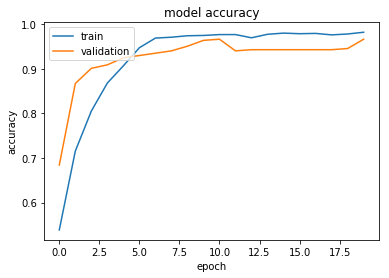

In [705]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

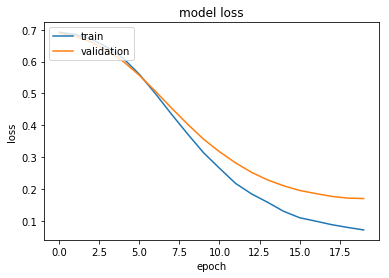

In [706]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## - Shallow Neural Network with (BOW)

In [556]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn import metrics 

num_labels = 1
input_nodes = xtrain_feature.shape[1]
num_hidden = 50

# build model
nnCOVE = Sequential()

nnCOVE.add(Dense(num_hidden, input_shape=(input_nodes,)))
nnCOVE.add(Activation('relu'))
nnCOVE.add(Dropout(0.5))

nnCOVE.add(Dense(num_labels))
nnCOVE.add(Activation('sigmoid'))
#model.summary()

nnCOVE.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

history = nnCOVE.fit(xtrain_feature, train_y, batch_size=256, epochs=12, validation_split=0.2, shuffle=True)

Train on 1528 samples, validate on 383 samples
Epoch 1/12
1528/1528 [==============================] - 1s 961us/step - loss: 0.6808 - acc: 0.5497 - val_loss: 0.6505 - val_acc: 0.7415
Epoch 2/12
1528/1528 [==============================] - 0s 76us/step - loss: 0.6269 - acc: 0.7853 - val_loss: 0.6027 - val_acc: 0.8564
Epoch 3/12
1528/1528 [==============================] - 0s 75us/step - loss: 0.5785 - acc: 0.8652 - val_loss: 0.5530 - val_acc: 0.9112
Epoch 4/12
1528/1528 [==============================] - 0s 70us/step - loss: 0.5246 - acc: 0.9097 - val_loss: 0.5039 - val_acc: 0.9243
Epoch 5/12
1528/1528 [==============================] - 0s 72us/step - loss: 0.4733 - acc: 0.9287 - val_loss: 0.4573 - val_acc: 0.9269
Epoch 6/12
1528/1528 [==============================] - 0s 73us/step - loss: 0.4276 - acc: 0.9365 - val_loss: 0.4152 - val_acc: 0.9347
Epoch 7/12
1528/1528 [==============================] - 0s 71us/step - loss: 0.3863 - acc: 0.9450 - val_loss: 0.3779 - val_acc: 0.9373
Epoch 8

In [557]:
score = nnCOVE.evaluate(xtest_feature, test_y)
print("Test score:", score[0])
print('Test accuracy:', score[1])

637/637 [==============================] - 0s 122us/step
Test score: 0.23583283023894114
Test accuracy: 0.9560439552018182


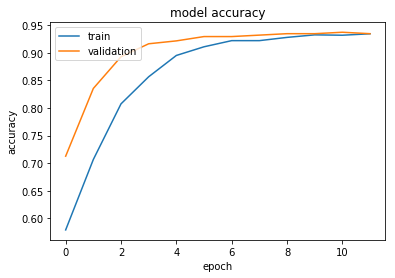

In [536]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

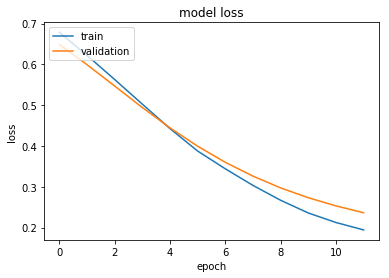

In [527]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### User Input Classification

In [42]:
def cleanUserInputData(string):
    
    newString = string[:]
    newString = removeLinks(newString)
    newString = normalize(newString)
    newString = removeDCaracters(newString)
    #newString = stemmer(newString)
    newString = textRemoveNumbers(newString)
    newString = removeEnglishLetters(newString)
    newString = textRemovePunctuation(newString)
    newString = textRemoveStopWords(newString)
    
    return newString

In [43]:
def featureExtractionUserInputData(feModel, string):
    return feModel.transform(string)

In [47]:
def classify(string, classifier):
    if classifier == nnCOVE or classifier ==nnTFIDF:
        value = classifier.predict(string)
        print(classifier.predict_classes(string))
        if value[0][0] >= 0.5:
            return ('SPAM with confidence of %f' % (value[0][0]))
        else:
            return ('HAM with confidence of %f' % (1-value[0][0]))
    else:
        if classifier.predict(string) == 1:
            return 'SPAM'
        else:
            return 'HAM'

In [45]:
def readInputAndClassify(feModel, classifier):
    string = input('Please Enter You Tweet')
    string = cleanUserInputData(string)
    string = featureExtractionUserInputData(feModel, [string])
    return classify(string, classifier)

In [91]:
readInputAndClassify(COVEmodel, nnCOVE)

Please Enter You Tweetالباقة


'HAM with confidence of 0.569104'

In [92]:
readInputAndClassify(COVEmodel, naiveCOVE)

Please Enter You Tweetالباقة


'SPAM'

In [50]:
readInputAndClassify(TFIDFmodel, nnTFIDF)

Please Enter You Tweetفعل عرض واربح معنا
[[1]]


'SPAM with confidence of 0.639414'

In [93]:
readInputAndClassify(TFIDFmodel, naiveTFIDF)

Please Enter You Tweetالباقة


'HAM'